<a href="https://colab.research.google.com/github/elsa9421/Interactive-IPython-Demos/blob/main/Interactive_soft_margin_SVM_EECS545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This IPython Notebook show the effect of variation of hyperparmeter- "C" on the SVM decision boundary and margins 

In [ ]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt

#!pip install ipywidgets  # installing widgets required for interactive sliders

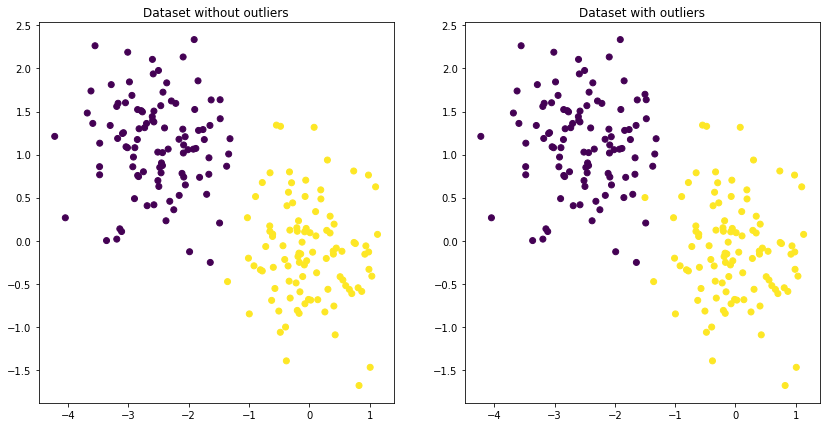

(-1.8846096137304449, 2.5366625380144447)


In [ ]:
from sklearn.datasets import make_blobs,make_classification
from sklearn import svm
import numpy as np


n_samples = 200
X, y = make_blobs(n_samples=n_samples, centers=[(-2.5, 1), (0,0)], random_state=24, cluster_std=0.60)

plt.figure(figsize=(14,7))
fig=plt.gcf()
fig.set_facecolor('white')
plt.subplot(1,2,1)
#Ploting the dataset without outliers
plt.scatter(X[:, 0], X[:, 1], c=y)


plt.title("Dataset without outliers")


#Adding outliers..as required
#x_outlier=[(-1.85,0.5),(-1.5,1.7),(-1.20,2),(-1.3,1)]
x_outlier=[(-1.85,0.5),(-1.5,1.7),(-1.5,0.5)]
X = np.concatenate([X, x_outlier], axis=0)


#Labelling the outliers...as required

y=  np.concatenate([y,[0,0,1]],axis=0)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y                 
#Ploting the dataset with outliers
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset with outliers")
ylim=plt.ylim()
plt.show()
print(ylim)




In [ ]:
def plot_portfolio(C=100):
    
    '''
    Function to plot SVM decision boundary 

    '''

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    #C = 100 # SVM regularization parameter
    y_pred = svm.SVC(kernel='linear', C=C).fit(X, y)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    x_vec=np.linspace(x_min,x_max)
    #x_vec=np.linspace(-5,1.5)

    plt.figure(figsize=(7,7))
    fig=plt.gcf()
    fig.set_facecolor('white')

    
    plt.plot(x_vec,-(y_pred.coef_[0][0]/y_pred.coef_[0][1])* x_vec - y_pred.intercept_/y_pred.coef_[0][1],color='black')


    d_boundary=-(y_pred.coef_[0][0]/y_pred.coef_[0][1])* x_vec - y_pred.intercept_/y_pred.coef_[0][1]    #------eq(1)

    plt.scatter(y_pred.support_vectors_[:, 0], y_pred.support_vectors_[:, 1], s=120, facecolors='none', edgecolors='k')

    

    w = y_pred.coef_[0]
    m1 = -w[0] / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+m1^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(y_pred.coef_ ** 2))
    yy_down = d_boundary - np.sqrt(1 + m1** 2) * margin     #-----eq(2)
    yy_up = d_boundary + np.sqrt(1 + m1 ** 2) * margin      ##-----eq(3)

    plt.plot(x_vec, yy_down, 'k--') # Class 1 
    plt.plot(x_vec, yy_up, 'k--')  # Class 0 
 
    #Ploting the dataset with outliers
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.ylim(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
  
    plt.title("SVM with C={}".format(C))

    

  

In [ ]:

C_slider=widgets.FloatLogSlider(
    value=100,
    base=10,
    min=-2, # min exponent of base
    max=3, # max exponent of base
    step=1, # exponent step
    description='Log Slider'
)



#interactive(plot_portfolio,C=C_slider)

out=widgets.interactive_output(plot_portfolio,{"C":C_slider})
display(C_slider,out)



FloatLogSlider(value=100.0, description='Log Slider', max=3.0, min=-2.0, step=1.0)

Output()